# Import Data & Packages

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
fixed = pd.read_excel("Data.xlsx")

In [8]:
fixed.columns

Index(['Unnamed: 0', 'nsrrid', 'visitnumber', 'NN_RR', 'AVNN', 'IHR', 'SDNN',
       'SDANN', 'SDNNIDX', 'rMSSD', 'pNN10', 'pNN20', 'pNN30', 'pNN40',
       'pNN50', 'tot_pwr', 'ULF', 'VLF', 'LF', 'HF', 'LF_HF', 'LF_n', 'HF_n',
       'nsrr_age', 'nsrr_age_gt89', 'nsrr_sex', 'nsrr_bmi', 'nsrr_ahi_hp3u',
       'nsrr_ahi_hp3r_aasm15', 'nsrr_ahi_hp4u_aasm15', 'nsrr_ahi_hp4r',
       'nsrr_current_smoker', 'neck20', 'ahi_severity', 'Apnea_digit',
       'Apnea_Category'],
      dtype='object')

# Analysis

In [9]:
variables = ['nsrr_bmi','rMSSD','neck20','Apnea_Category']

In [11]:
df = fixed  

data = df[variables].copy()

data.dropna(inplace=True)

#Data Splitting
X = data.drop('Apnea_Category', axis=1)
y = data['Apnea_Category']

# Convert labels to binary (0 and 1)
y_binary = np.where(y == 'Apnea', 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Perform logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

# Calculate the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {auc_roc:.2f}")


Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.75      0.58      0.65        31
           1       0.77      0.88      0.82        50

    accuracy                           0.77        81
   macro avg       0.76      0.73      0.74        81
weighted avg       0.76      0.77      0.76        81

AUC-ROC Score: 0.80


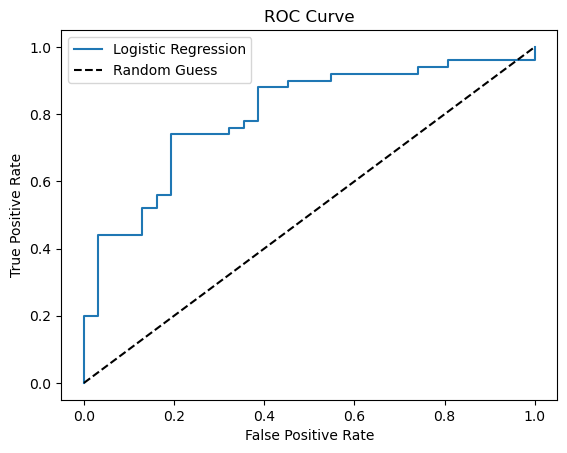

In [12]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [13]:
# Calculate the AUPRC score
auprc = average_precision_score(y_test, y_pred_prob)
print(f"AUPRC: {auprc:.2f}")

AUPRC: 0.87


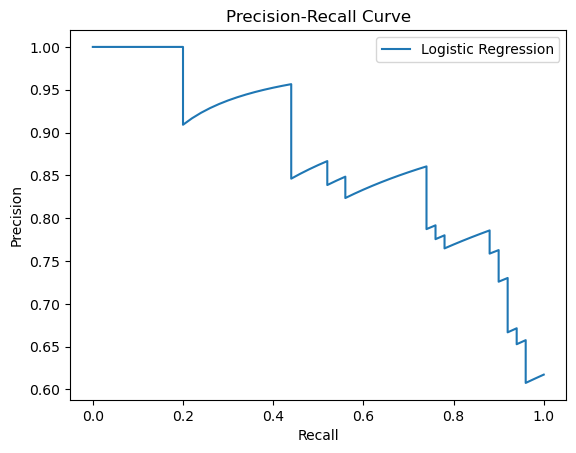

In [14]:
# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

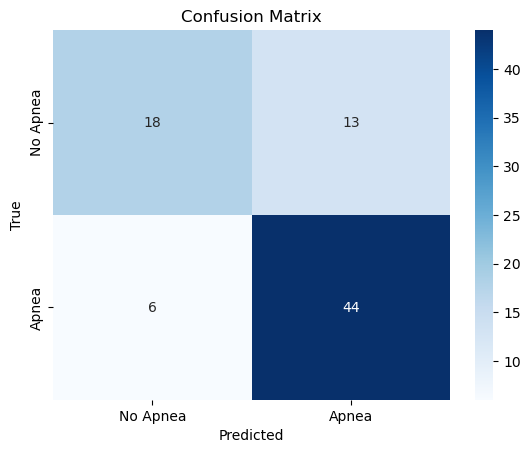

In [15]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['No Apnea', 'Apnea']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Conclusion

The Model has a 77% accuracy in predicting Sleep Apnea with the variables:

- Heart Rate Variability Measurement: rMSSD
- BMI
- Neck Circumference